In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image




In [13]:
df = pd.read_csv("archive/HAM10000_metadata.csv")

In [14]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [16]:
def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

basic_EDA(df)

Number of Samples: 10015,
Number of Features: 7,
Duplicated Entries: 0,
Null Entries: 57,
Number of Rows with Null Entries: 57 0.6%


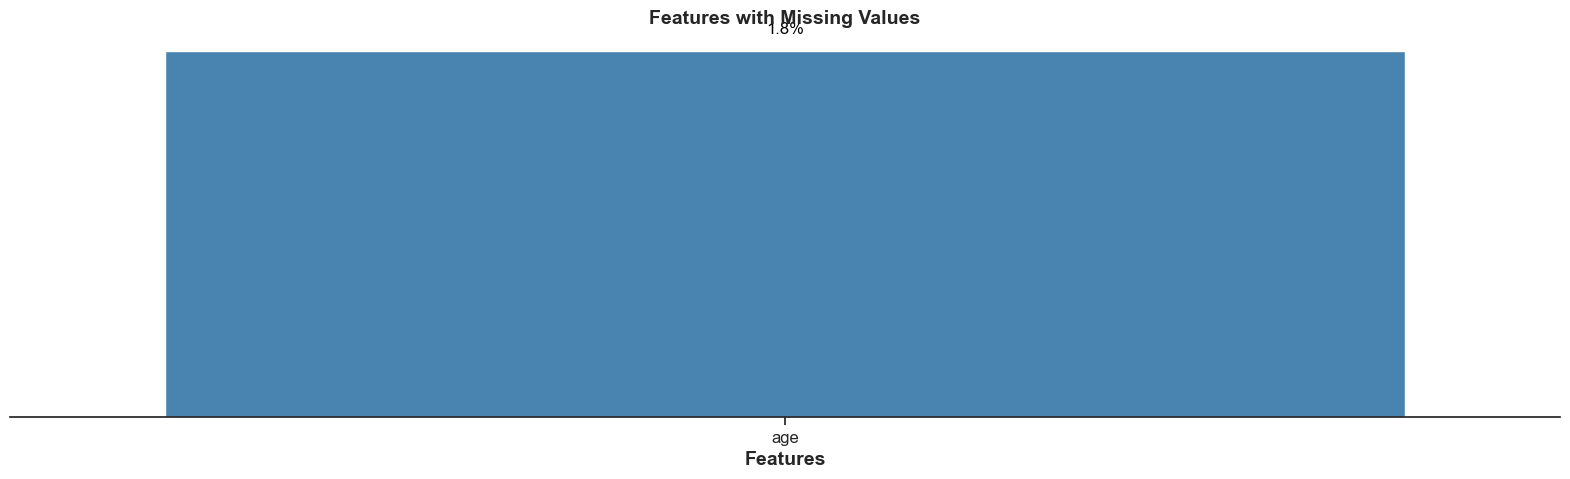

In [17]:
def bar_plot(x,y,xlabel,ylabel,title):
    plt.figure(figsize=(20,5))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.barplot(x=x, y = y, palette="Blues_d")
    sns.despine(top=True, right=True, left=True, bottom=False)
    plt.xticks(rotation=0,fontsize = 12)
    ax.set_xlabel(xlabel,fontsize = 14,weight = 'bold')
    ax.set_ylabel(ylabel,fontsize = 14,weight = 'bold')
    ax.set(yticklabels=[])
    ax.axes.get_yaxis().set_visible(False) 
    plt.title(title,fontsize = 14,weight = 'bold')
    
    for p in ax.patches:
                     ax.annotate("%.1f%%" % (100*float(p.get_height()/3101)), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                         ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
                         textcoords='offset points')


def Null_Analysis(df,title):
    null_columns=df.columns[df.isnull().any()]
    null_columns_plot = df[null_columns].isnull().sum().sort_values(ascending = False)
    bar_plot(null_columns_plot.index, null_columns_plot,"Features", "Percentage of Null Values", title)
    
Null_Analysis(df, "Features with Missing Values")

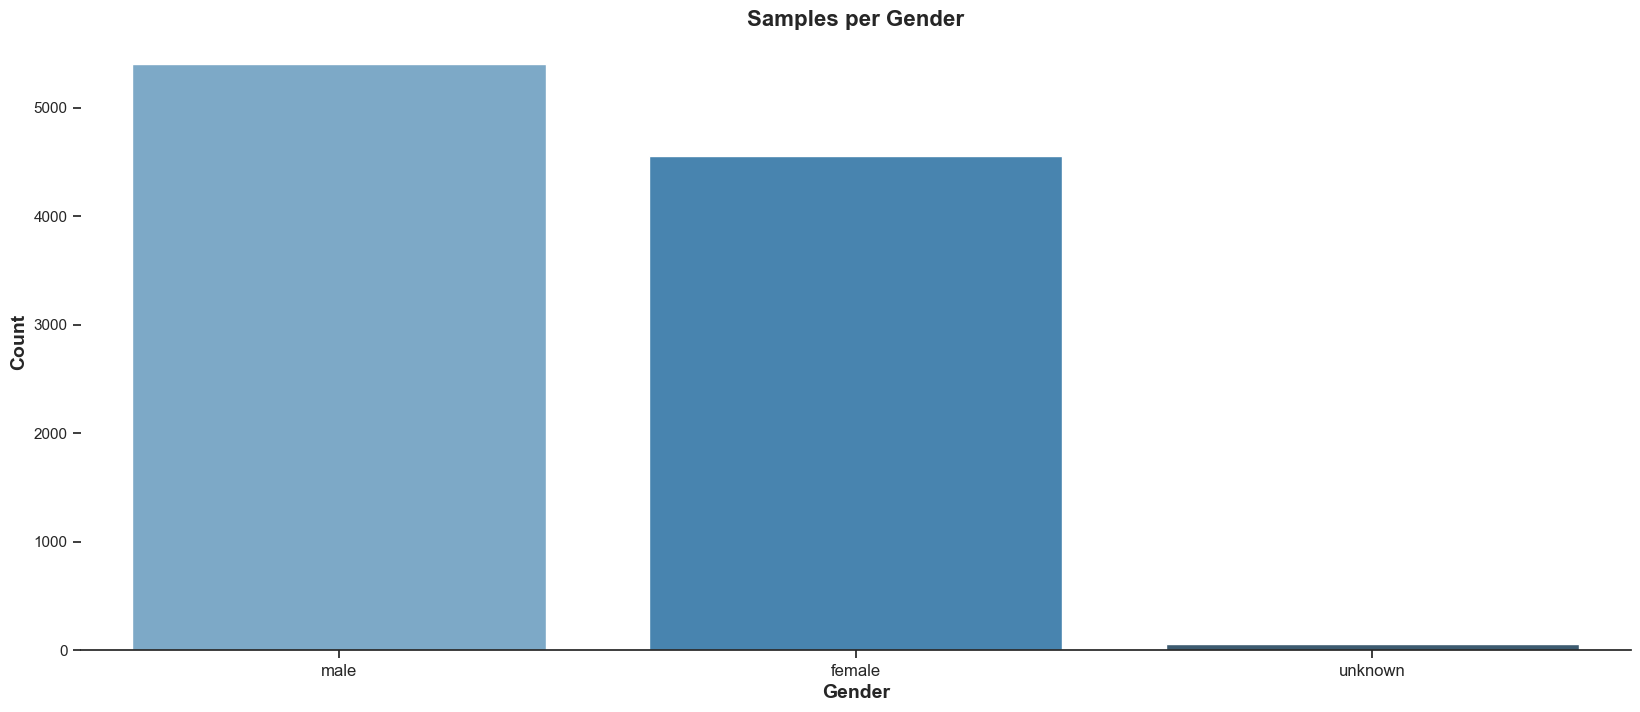

In [18]:
def countplot(df, x, x_axis_title,y_axys_title, plot_title):
    plt.figure(figsize=(20,8))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.countplot(data = df,x=x,order = df[x].value_counts().index,palette="Blues_d")
    sns.despine(top=True, right=True, left=True, bottom=False)
    plt.xticks(rotation=0,fontsize = 12)
    ax.set_xlabel(x_axis_title,fontsize = 14,weight = 'bold')
    ax.set_ylabel(y_axys_title,fontsize = 14,weight = 'bold')
    plt.title(plot_title, fontsize = 16,weight = 'bold')

countplot(df,'sex', 'Gender', 'Count', 'Samples per Gender')

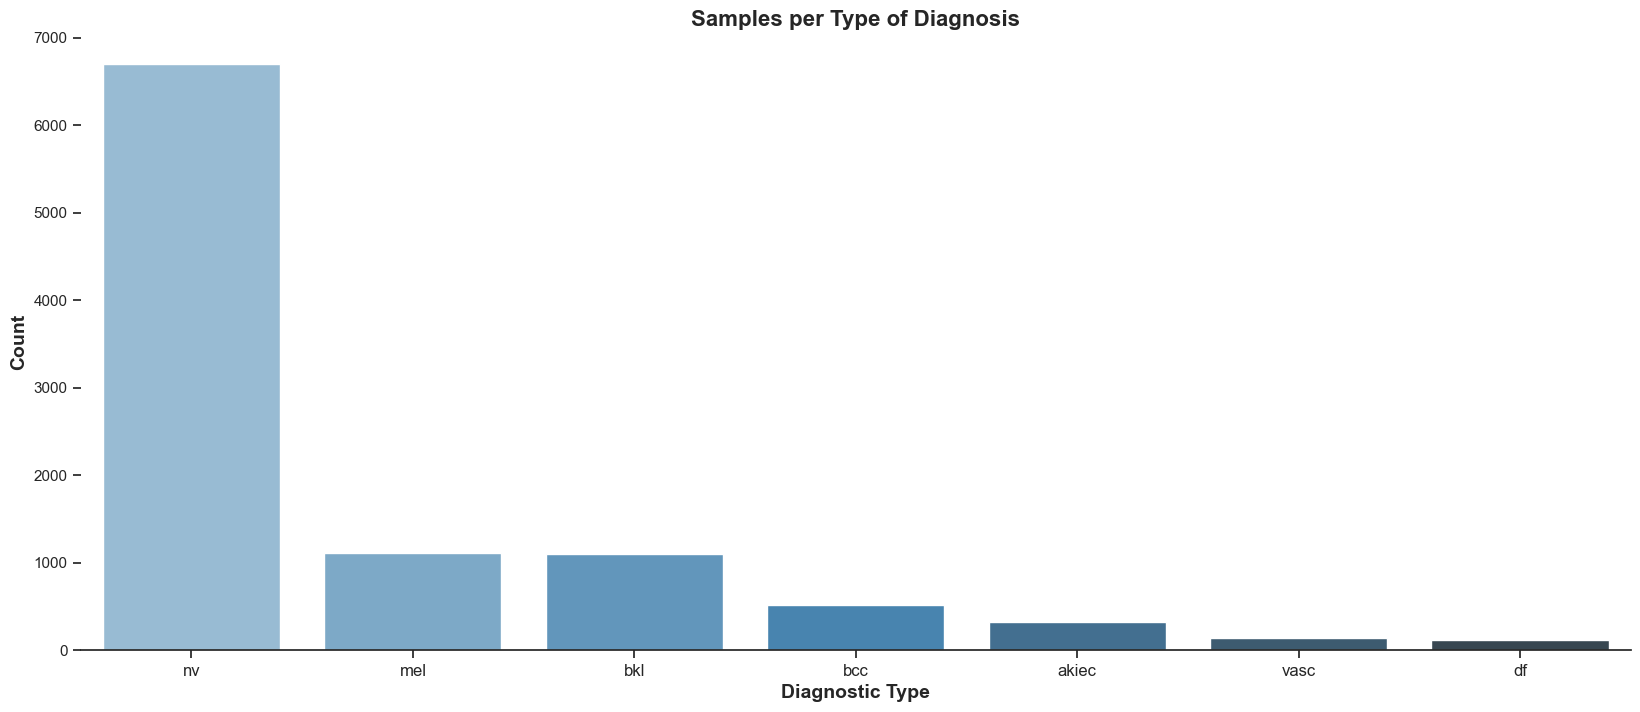

In [19]:
countplot(df,'dx', 'Diagnostic Type', 'Count', 'Samples per Type of Diagnosis')

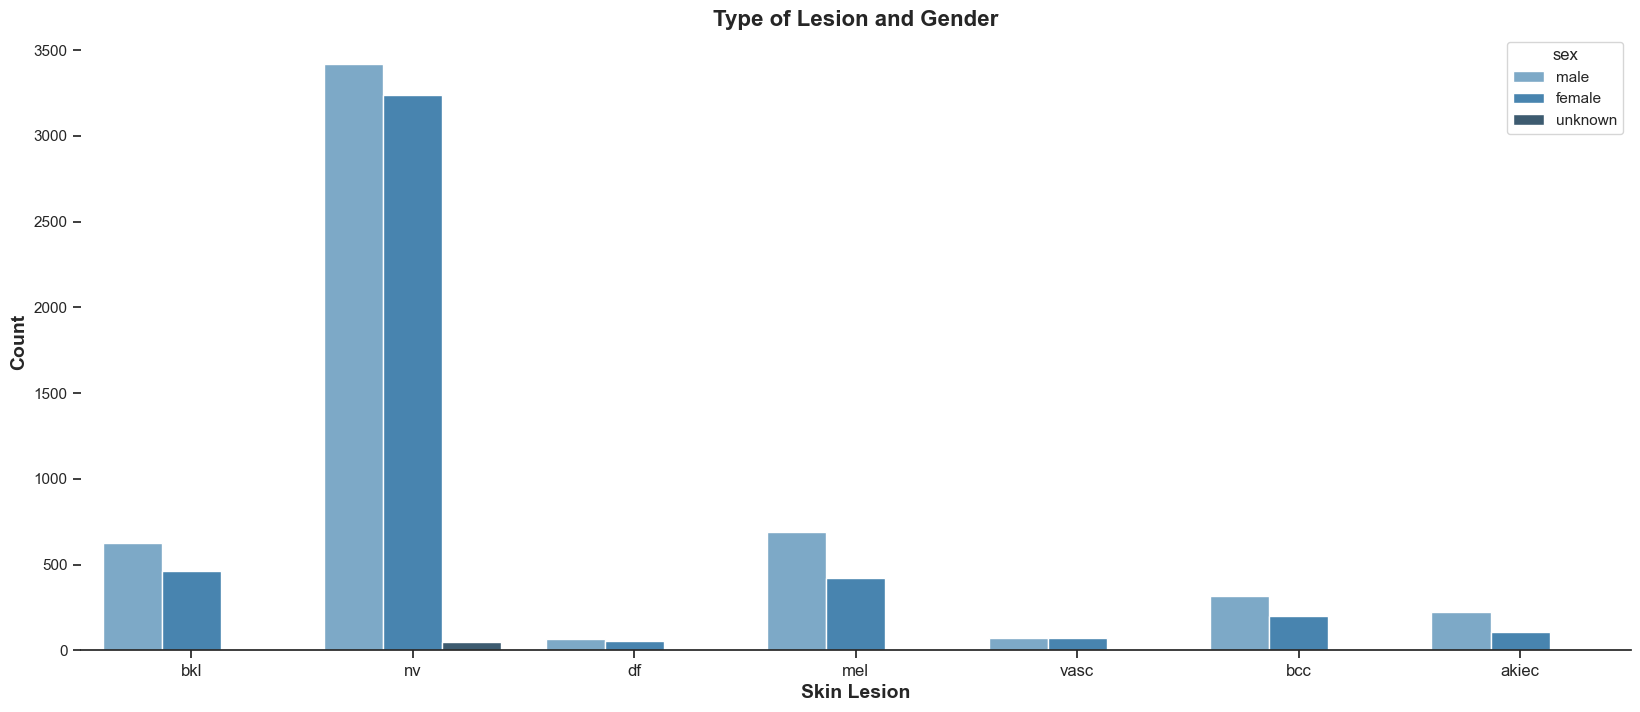

In [20]:
plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 1)
ax = sns.countplot(data = df,x='dx',palette="Blues_d", hue = 'sex')
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Skin Lesion',fontsize = 14,weight = 'bold')
ax.set_ylabel('Count',fontsize = 14,weight = 'bold')
plt.title('Type of Lesion and Gender', fontsize=16, weight='bold');
